# Predicting the *TotalGHGEmissions* with supervised machine learning algorithms

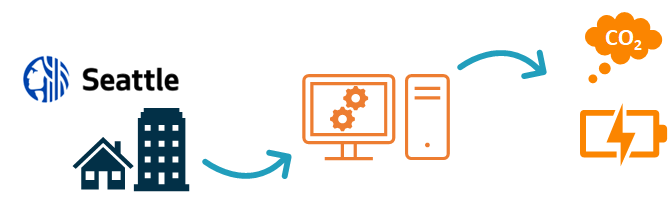

After de EDA and cleaning of the dataset, the data are almost ready to be fed to a machine learning algorithm. In order to improve the model performances, the features can be reprocessed. As an example, numerical features can me rescaled. Another common method is the encoding of categorical features.

In this document, the data previously cleaned have been imported. Then a naive model has been employed for predicting the target *TotalGHGEmissions*. Then, the performances brought by several methods of data preprocessing have been assessed.

Then, the performances of several machine learning models have been assessed with the appropriate metrics.

Finally, the prediction resulting from the higher-performing model has been studied in detail. Moreover, the relevance of the *EnergyStarScore*, a feature that is costly to estimate, have been assessed.

**Importing libraries and custom colors**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

C:\ProgramData\Anaconda3\envs\Project_3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import make_union
from sklearn.compose import make_column_transformer

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV


from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [3]:
# Create a log transformer for converting data to log
LogTransformer = FunctionTransformer(func = np.log1p, feature_names_out = 'one-to-one')


# Create custom encoder for categorical data
def none_cat_encoder(df):
    df[df == 'None'] = 0
    df[df != 0] = 1
    return df

custom_cat_encoder = FunctionTransformer(none_cat_encoder,
                                         feature_names_out = 'one-to-one')

In [4]:
# Custom colors for charts

c_0 = np.array([2, 48, 71,256])/256
c_1 = np.array([251, 133, 0,256])/256
c_2 = np.array([255, 183, 3,256])/256
c_3 = np.array([33, 158, 188,256])/256
c_4 = np.array([142, 202, 230,256])/256

# Creating a custom colormap
# The code comes from https://matplotlib.org/3.1.1/tutorials/colors/colormap-manipulation.html
from matplotlib.colors import ListedColormap

N = 256
vals = np.ones((N, 4))
vals[:, 0] = np.linspace(c_0[0], c_1[0], N)
vals[:, 1] = np.linspace(c_0[1], c_1[1], N)
vals[:, 2] = np.linspace(c_0[2], c_1[2], N)
custom_cmp1 = ListedColormap(vals)

# A colormap with white in the middle
N = 256
vals = np.ones((N, 4))
vals[:, 0] = np.concatenate((np.linspace(c_0[0], 1, 128), np.linspace(1, c_1[0], 128)), axis = None)
vals[:, 1] = np.concatenate((np.linspace(c_0[1], 1, 128), np.linspace(1, c_1[1], 128)), axis = None)
vals[:, 2] = np.concatenate((np.linspace(c_0[2], 1, 128), np.linspace(1, c_1[2], 128)), axis = None)
custom_cmp2 = ListedColormap(vals)

In [5]:
# Importing the data
df = pd.read_csv('cleaned_df.csv')
df.head()

,BuildingType,PrimaryPropertyType,Neighborhood,YearBuilt,NumberofBuildings,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,...,ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions,distance(km),streetType,ElectricityProp,NaturalGasProp,SteamProp,OtherEnergyProp,Imp_NumberofFloors
0,NonResidential,Hotel,DOWNTOWN,1927,1.0,0,88434,Hotel,None,0.0,...,60.0,7226362.5,249.98,0.512422,way,0.546060,0.176638,0.277302,6.919110e-08,12
1,NonResidential,Hotel,DOWNTOWN,1996,1.0,15064,88502,Hotel,Parking,15064.0,...,61.0,8387933.0,295.86,0.624190,street,0.386609,0.613391,0.000000,0.000000e+00,11
2,NonResidential,Hotel,DOWNTOWN,1969,1.0,196718,759392,Hotel,None,0.0,...,43.0,72587024.0,2089.28,0.701359,avenue,0.682307,0.020579,0.297113,8.265940e-08,41
3,NonResidential,Hotel,DOWNTOWN,1926,1.0,0,61320,Hotel,None,0.0,...,56.0,6794584.0,286.43,0.708090,street,0.407519,0.266567,0.325913,1.103820e-07,10
4,NonResidential,Hotel,DOWNTOWN,1980,1.0,62000,113580,Hotel,Parking,68009.0,...,75.0,14172606.0,505.01,0.740453,street,0.378802,0.621198,0.000000,7.055865e-08,18


# 1. Data Preprocessing

## 1.1 Evaluation with a naive model

Once imported, a naive model on numerical data is built to identify problems of under- and overfitting

In [6]:
# First naive model


# Raw data
x = df.select_dtypes(include = [float, int]).drop(['TotalGHGEmissions', 'ENERGYSTARScore', 'SiteEnergyUse(kBtu)'], axis = 1)
y = df['TotalGHGEmissions']

# Train and test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

# Scaling
scaler = StandardScaler().fit(x_train)

x_train_sc = scaler.transform(x_train)

x_test_sc = scaler.transform(x_test)

<AxesSubplot:>

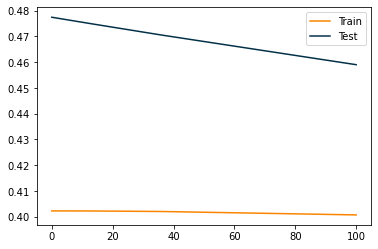

In [7]:
# Building and trainning the model (without cross-validation for estimation of weights)

test_score = []
train_score = []
weights = []


for alpha in np.logspace(-2, 2, 10):
    model = Ridge(alpha = alpha)
    model.fit(x_train_sc, y_train)
    
    train_score.append(model.score(x_train_sc, y_train))
    test_score.append(model.score(x_test_sc, y_test))
    weights.append(model.coef_)


sns.lineplot(x = np.logspace(-2, 2, 10), y = train_score, color = c_1, label = 'Train')
sns.lineplot(x = np.logspace(-2, 2, 10), y = test_score, color = c_0, label = 'Test')

The model offers poor performances:

- The difference between the test and train set show overfitting
- Data like PropertyGFABuildings have extreme weigts when compared to other parameters

## 1.2 Data preprocessing

In order to better understand the data, various models are fitted to the data and different methods of feature engineering are assessed

In [9]:
def model_eval(transformer, model, cv_params, x_train, x_test, y_train, y_test): # Function to evaluate a given model
    # The model is put in a pipepline
    pipe = make_pipeline(transformer, model)
    # The model is evaluated and optimised through cross validation
    pipe_cv = GridSearchCV(pipe, cv_params, cv = 5)

    pipe_cv.fit(x_train, y_train)
    
    y_train_pred = pipe_cv.predict(x_train)
    y_test_pred = pipe_cv.predict(x_test)
    
    # Results are put in a table and displayed
    results = [
        ('R²', r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)),
        ('MSE', mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)),
        ('RMSE', mean_squared_error(y_train, y_train_pred, squared = False), mean_squared_error(y_test, y_test_pred, squared = False)),
        ('MAE', mean_absolute_error(y_train, y_train_pred), mean_absolute_error(y_test, y_test_pred))
    ]
    
    print('{:<5} {:<20} {:<20}'.format(' ','Train','Test'))
    
    for line in results:
        print(f'{line[0]:<5}{line[1]:<20.3}{line[2]:<20.3}')
    

    return pipe_cv
    

### 1.2.1 Log conversion

First, the conversion of features to log is assessed
For the sake of simplicity, a function is created for model evaluation

In [10]:
# Features that could be log according to the EDA
log_list = ['NumberofBuildings',
'NumberofFloors',
'PropertyGFATotal',
'PropertyGFAParking',
'PropertyGFABuilding(s)',
'LargestPropertyUseTypeGFA',
'SecondLargestPropertyUseTypeGFA',
'ThirdLargestPropertyUseTypeGFA',
'SiteEUI(kBtu/sf)',
'SiteEUIWN(kBtu/sf)',
'SourceEUI(kBtu/sf)',
'SourceEUIWN(kBtu/sf)',
'SiteEnergyUse(kBtu)',
'SiteEnergyUseWN(kBtu)',
'SteamUse(kBtu)',
'Electricity(kWh)',
'Electricity(kBtu)',
'NaturalGas(therms)',
'NaturalGas(kBtu)',
'TotalGHGEmissions',
'GHGEmissionsIntensity',
'Imp_NumberofFloors']

The features are converted to log through the transformer.

The target is also converted to log and standardised beforehand.

In [11]:
x = df[['PropertyGFABuilding(s)', 'Imp_NumberofFloors']]
y = df['TotalGHGEmissions']

# Train and test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

# Target preprocessing

t_scaler = StandardScaler().fit(np.log1p(y_train.values.reshape(-1,1)))

y_train = t_scaler.transform(np.log1p(y_train).values.reshape(-1,1))
y_test = t_scaler.transform(np.log1p(y_test).values.reshape(-1,1))

# Features preprocessing

transformer = make_pipeline(LogTransformer, StandardScaler()) # LogTransformer was defined earlier and convert to ln

model = Ridge()

params_cv = {'ridge__alpha' : np.logspace(-2, 3, 10)}


model = model_eval(scaler, Ridge(), params_cv, x_train, x_test, y_train, y_test)

      Train                Test                
R²   0.24                0.247               
MSE  0.76                0.685               
RMSE 0.872               0.827               
MAE  0.683               0.666               


The target is represented before and after processing

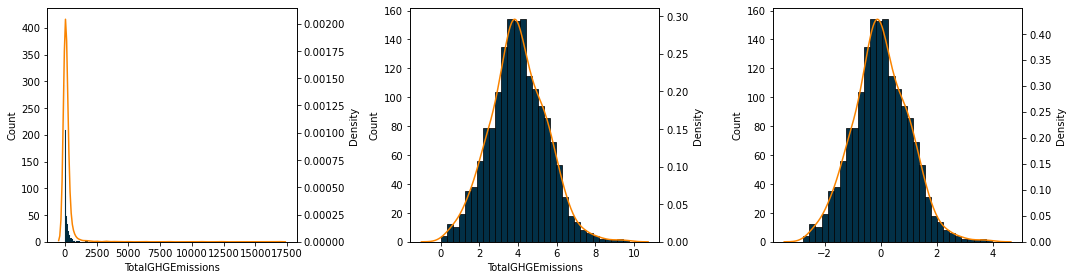

In [12]:
fig = plt.figure(figsize = (15, 4))

ax1 = fig.add_subplot(131)
sns.histplot(y, color = c_0, alpha = 1, ax = ax1)
ax2 = plt.twinx()
sns.kdeplot(y, color = c_1, ax = ax2)

ax3 = fig.add_subplot(132)
sns.histplot(np.log1p(y), color = c_0, alpha = 1, ax = ax3)
ax4 = plt.twinx()
sns.kdeplot(np.log1p(y), color = c_1, ax = ax4)

ax5 = fig.add_subplot(133)
sns.histplot(StandardScaler().fit_transform(np.log1p(y.values.reshape(-1,1))).reshape(-1,), color = c_0, alpha = 1, ax = ax5)
ax6 = plt.twinx()
sns.kdeplot(StandardScaler().fit_transform(np.log1p(y.values.reshape(-1,1))).reshape(-1,), color = c_1, ax = ax6)

plt.tight_layout()

This time the model shows very poor performances.

## 1.2.2 Encoding categories

For the model to be able to process categorical features, the features should be encoded numericaly.

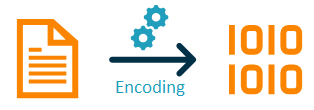

Two methods of encoding have been assessed. The first method replace non-null values by 1 and empty values by 0, indicating the presence or not of a categorical feature for the sample. The second method is OneHot encoding (OHE). OHE is generaly preferend for features with n_features <= 15.

Categories with a large number of unique labels or with to much empty values have more chances to have labels representing a low proportion of individuals and could raise errors as labels in the test set could have more chance to not be represented in the train set. This is the case for *SecondLargestPropertyUseType* ans *ThirdLargestPropertyUseType* that must be encoded through the custom encoding strategy.

In order to estimate which feature should be encoded with OHE and which should be encoded with the custom strategy, models have been fed with features encoded differently depending on the number of unique value they contain. As explained earlier, a feature with a low number of unique values have better chances to be better represented with OHE and vice versa.

Models have been fed with data that have been encoded differently depending on a threshold. Features with a number of unique values under the threshold have been encoded with the OHE. The other features have been encoded with the custom method. All numerical have also been added.

The threshold has then been moved and the performance of each model has been assessed with relevant metrics.

In [13]:
'''
x and y preprocessing
'''

x = df.drop(['TotalGHGEmissions', 'ENERGYSTARScore', 'SiteEnergyUse(kBtu)'], axis = 1)
y = df['TotalGHGEmissions']

# Train and test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)



# Target preprocessing

t_scaler = StandardScaler().fit(np.log1p(y_train.values.reshape(-1,1)))

y_train = t_scaler.transform(np.log1p(y_train).values.reshape(-1,1))
y_test = t_scaler.transform(np.log1p(y_test).values.reshape(-1,1))


# Features preprocessing

# split categorical and numerical columns

col_cat = x.select_dtypes(exclude = [float, int]).columns

col_num = x.select_dtypes(include = [float, int]).columns

# Numerical features preprocessing
# split log and non-log numerical data

col_log_num = [col for col in col_num if col in log_list]

col_nonLog_num = [col for col in col_num if col not in log_list]

pipe_log = make_pipeline(LogTransformer, StandardScaler()) # Creating a pipepline to both transform to log and scale numerical data





r_quared_train = [] # The score obtained on the test and train set are recorded to draw curves latter
r_quared_test = [] 

# Categorical feature preprocessing
# split cat depending on the number of unique labels per cat

for cat_threshold in [4, 6, 15, 23, 41, 49, 56]: # Under this threshold, HOE is performed

    print(f'Threshlod = {cat_threshold}')
    
    col_cat_HOE = [col for col in col_cat if df[col].nunique() <= cat_threshold]


    col_custom_cat_encoder = ['LargestPropertyUseType', 'SecondLargestPropertyUseType','ThirdLargestPropertyUseType']




    # Combining the preprocessing transformers

    transformer = make_column_transformer((pipe_log, col_log_num),
                                          (StandardScaler(), col_nonLog_num),
                                          (OneHotEncoder(handle_unknown = 'ignore'), col_cat_HOE),
                                          (custom_cat_encoder, col_custom_cat_encoder)) # Ordinal encoded data have been removed





    model = Ridge()

    params_cv = {'ridge__alpha' : np.logspace(-2, 3, 10)}


    model = model_eval(transformer, Ridge(), params_cv, x_train, x_test, y_train, y_test)
    
    r_quared_test.append(model.score(x_test, y_test))
    r_quared_train.append(model.score(x_train, y_train))

Threshlod = 4
      Train                Test                
R²   0.719               0.708               
MSE  0.281               0.266               
RMSE 0.53                0.515               
MAE  0.397               0.382               
Threshlod = 6
      Train                Test                
R²   0.723               0.714               
MSE  0.277               0.26                
RMSE 0.527               0.51                
MAE  0.393               0.376               
Threshlod = 15
      Train                Test                
R²   0.732               0.717               
MSE  0.268               0.257               
RMSE 0.517               0.507               
MAE  0.387               0.373               
Threshlod = 23
      Train                Test                
R²   0.814               0.795               
MSE  0.186               0.187               
RMSE 0.431               0.432               
MAE  0.317               0.317               
Threshlod = 41

The performances of the models depending on the threshold have been represented graphicaly:

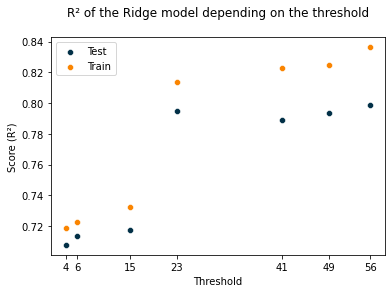

In [14]:
# The curves of the score depending on the threshold can be displayed
fig, ax = plt.subplots()

sns.scatterplot(x = [4, 6, 15, 23, 41, 49, 56], y = r_quared_test, label = 'Test', color = c_0, ax = ax)
sns.scatterplot(x = [4, 6, 15, 23, 41, 49, 56], y = r_quared_train, label = 'Train', color = c_1, ax = ax)

ax.set_xlabel('Threshold')
ax.set_ylabel('Score (R²)')
ax.set_xticks([4, 6, 15, 23, 41, 49, 56])

ax.set_title('R² of the Ridge model depending on the threshold\n')

plt.show()

In [15]:
df[col_cat].nunique()

BuildingType                     5
PrimaryPropertyType             22
Neighborhood                    14
LargestPropertyUseType          55
SecondLargestPropertyUseType    48
ThirdLargestPropertyUseType     40
streetType                       5
dtype: int64

The model shows this time way better performances with low to no overfitting and no traces of underfitting

The model show improved performances until an threshold of 23 (meaning including *PrimaryPropertyType* in the HOE encoding). Higher thresholds do not significantly improves the model performances.

### 1.2.3 Polynomial features

As certain relationships could be non linear, the influence en adding polynomial features of various degrees is observed

In [16]:
'''
x and y preprocessing
'''

x = df.drop(['TotalGHGEmissions', 'ENERGYSTARScore', 'SiteEnergyUse(kBtu)'], axis = 1)
y = df['TotalGHGEmissions']

# Train and test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

# Target preprocessing

t_scaler = StandardScaler().fit(np.log1p(y_train.values.reshape(-1,1)))

y_train = t_scaler.transform(np.log1p(y_train).values.reshape(-1,1))
y_test = t_scaler.transform(np.log1p(y_test).values.reshape(-1,1))



# split categorical and numerical columns

col_cat = x.select_dtypes(exclude = [float, int]).columns

col_num = x.select_dtypes(include = [float, int]).columns

# Numerical features preprocessing
# split log and non-log numerical data

col_log_num = [col for col in col_num if col in log_list]

col_nonLog_num = [col for col in col_num if col not in log_list]

pipe_log = make_pipeline(LogTransformer, PolynomialFeatures(), StandardScaler()) # Creating a pipepline to both transform to log, add polynomial features and scale numerical data

pipe_nonLog = make_pipeline(PolynomialFeatures(), StandardScaler()) # Creating a pipepline to both add polynomial features and scale numerical data



# Categorical feature preprocessing
# split cat depending on the number of unique labels per cat

cat_threshold = 25
    
col_cat_HOE = [col for col in col_cat if df[col].nunique() <= cat_threshold]


col_custom_cat_encoder = ['LargestPropertyUseType', 'SecondLargestPropertyUseType','ThirdLargestPropertyUseType']




# Combining the preprocessing transformers

transformer = make_column_transformer((pipe_log, col_log_num),
                                    (pipe_nonLog, col_nonLog_num),
                                    (OneHotEncoder(handle_unknown = 'ignore'), col_cat_HOE),
                                    (custom_cat_encoder, col_custom_cat_encoder)) # Ordinal encoded data have been removed





model = Ridge()

params_cv = {'columntransformer__pipeline-2__polynomialfeatures__degree' : [1, 2, 3, 4],
             'columntransformer__pipeline-1__polynomialfeatures__degree' : [1, 2, 3, 4],
             'ridge__alpha' : np.logspace(-3, -2, 1, 3)}


model = model_eval(transformer, Ridge(), params_cv, x_train, x_test, y_train, y_test)

      Train                Test                
R²   0.84                0.807               
MSE  0.16                0.176               
RMSE 0.4                 0.419               
MAE  0.295               0.31                


In [17]:
model.best_params_

{'columntransformer__pipeline-1__polynomialfeatures__degree': 2,
 'columntransformer__pipeline-2__polynomialfeatures__degree': 2,
 'ridge__alpha': 0.001}

It can be observed that polynomial features have a mild influence on the *TotalGHGEmissions* prediction and will thus not remain in the data procession procedure.

From features weights analysis is can be observed that :

- Have a low influence
    - Neighborhood
    - streetType
    - LargetPropertyUseType
    - SecondLargestPropertyUseType
    - ThirdLargestPropertyUseType
    

- Have a mild (-) influence
    - Number of building
    - Number of floors
    - distance(km)
    

- Have a mild (+) influence
    - BuildingType
    - PropertyGFABuilding(s)
    - PropertyGFAParking
    
    
- Have a strong influence
    - PrimaryPropertyType
    - Energy proportion
    - Year Build
    


Thus, for the sake of readability, the data preprocessing is summarized in a function.

The performances of the model through this function employing only features with important and mild weights are assessed.

In [19]:
def preprocessing(target):
    x = df.drop(['TotalGHGEmissions',
                 'ENERGYSTARScore',
                 'SiteEnergyUse(kBtu)',
                 'Neighborhood',
                 'streetType',
                 'LargestPropertyUseType',
                 'SecondLargestPropertyUseType',
                 'ThirdLargestPropertyUseType',
                 'NumberofBuildings',
                 'Imp_NumberofFloors',
                 'distance(km)'], axis = 1)

    y = df[target]

    # Train and test split
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
    
    # Target preprocessing

    t_scaler = StandardScaler().fit(np.log1p(y_train.values.reshape(-1,1)))

    y_train = t_scaler.transform(np.log1p(y_train).values.reshape(-1,1)).reshape(-1,)
    y_test = t_scaler.transform(np.log1p(y_test).values.reshape(-1,1)).reshape(-1,)
    
    

    # split categorical and numerical columns

    col_cat = x.select_dtypes(exclude = [float, int]).columns

    col_num = x.select_dtypes(include = [float, int]).columns

    # Numerical features preprocessing
    # split log and non-log numerical data

    col_log_num = [col for col in col_num if col in log_list]

    col_nonLog_num = [col for col in col_num if col not in log_list]

    pipe_log = make_pipeline(LogTransformer, StandardScaler()) # Creating a pipepline to both transform to log, add polynomial features and scale numerical data

    pipe_nonLog = make_pipeline(StandardScaler()) # Creating a pipepline to both add polynomial features and scale numerical data



    # Categorical feature preprocessing
    # split cat depending on the number of unique labels per cat

    cat_threshold = 25

    col_cat_HOE = [col for col in col_cat if df[col].nunique() <= cat_threshold]







    # Combining the preprocessing transformers

    transformer = make_column_transformer((pipe_log, col_log_num),
                                        (pipe_nonLog, col_nonLog_num),
                                        (OneHotEncoder(handle_unknown = 'ignore'), col_cat_HOE))
    
    return x_train, x_test, y_train, y_test, transformer, t_scaler

In [21]:
'''
x and y preprocessing
'''
for target in ['TotalGHGEmissions']:
    print('Target : ', target) 
    
    model = Ridge()

    params_cv = {'ridge__alpha' : np.logspace(-3, 2, 10)}

    
    x_train, x_test, y_train, y_test, transformer, t_scaler = preprocessing(target)
    
    model = model_eval(transformer, Ridge(), params_cv, x_train, x_test, y_train, y_test)

Target :  TotalGHGEmissions
      Train                Test                
R²   0.814               0.783               
MSE  0.186               0.189               
RMSE 0.431               0.435               
MAE  0.314               0.327               


# 2. Model selection 

Now that features have been selected and engineered, several machine learning models have been applied, fed with the data, optimized with cross-validation and assessed with the relevant metrics.

## 2.1 Assessment of a list of models

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import learning_curve






model_list = [[LinearRegression(), {}],
              [Ridge(), {'ridge__alpha' : np.logspace(-3,2,10)}],
              [Lasso(max_iter = 2000, tol = 0.001), {'lasso__alpha' : np.logspace(-3,2,10)}],
              [SVR(), {'svr__C' : np.logspace(-3,0,10), 'svr__kernel' : ['linear', 'poly', 'rbf', 'sigmoid']}],
              [DecisionTreeRegressor(), {'decisiontreeregressor__min_samples_leaf' : [1, 10, 100]}],
              [RandomForestRegressor(), {'randomforestregressor__min_samples_leaf' : [1, 10, 100]}],
              [XGBRegressor(), {}]]

model_dict = {}

for target in ['TotalGHGEmissions']:
    print('Target : ', target)
    
    # Data Preprocessing
    x_train, x_test, y_train, y_test, transformer, t_scaler = preprocessing(target)
    

    for model_and_params in model_list:
        print('Model : ', model_and_params[0])

        model = model_and_params[0]

        params_cv = model_and_params[1]
        
        # The new model is added to the dict for further evaluation
        model_dict[str(model_and_params[0])] = model_eval(transformer, model, params_cv, x_train, x_test, y_train, y_test)


C:\ProgramData\Anaconda3\envs\Project_3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


Target :  TotalGHGEmissions
Model :  LinearRegression()
      Train                Test                
R²   0.814               -1.9e+20            
MSE  0.186               1.66e+20            
RMSE 0.431               1.29e+10            
MAE  0.314               5.79e+08            
Model :  Ridge()
      Train                Test                
R²   0.814               0.783               
MSE  0.186               0.189               
RMSE 0.431               0.435               
MAE  0.314               0.327               
Model :  Lasso(max_iter=2000, tol=0.001)
      Train                Test                
R²   0.814               0.783               
MSE  0.186               0.189               
RMSE 0.431               0.435               
MAE  0.314               0.326               
Model :  SVR()
      Train                Test                
R²   0.81                0.784               
MSE  0.19                0.188               
RMSE 0.436               0.434     

For the target *TotalGHGEmissions*

- The higher score without traces of overfitting is the lasso.
- The higher score but with clear overfitting is the RandomForestRegressor and XGBRegressor.


Thus these two models will be further optimised for the determination of both targets

## 2.2 Ridge regression

In [25]:
# Data Preprocessing
x_train, x_test, y_train, y_test, transformer, t_scaler = preprocessing('TotalGHGEmissions')

In [26]:
model = Ridge()

params_cv = {'ridge__alpha': np.logspace(-4, 2, 10)}


model = model_eval(transformer, model, params_cv, x_train, x_test, y_train, y_test)

      Train                Test                
R²   0.815               0.783               
MSE  0.185               0.19                
RMSE 0.43                0.435               
MAE  0.312               0.327               


In [27]:
model.best_params_

{'ridge__alpha': 1.0}

The Ridge model shows good performances but with traces of overfitting

## 2.3 XGboost

In [28]:
model = XGBRegressor(booster='gbtree', max_depth = 1)

params_cv = {'xgbregressor__eta' : [0.1, 0.3, 0.4],
             'xgbregressor__subsample' : [0.5, 0.75, 1]}


model = model_eval(transformer, model, params_cv, x_train, x_test, y_train, y_test)

      Train                Test                
R²   0.879               0.82                
MSE  0.121               0.157               
RMSE 0.348               0.397               
MAE  0.268               0.307               


In [29]:
model.best_params_

{'xgbregressor__eta': 0.4, 'xgbregressor__subsample': 0.75}

# 3. Model evaluation

The capacity of the model to generalise and give accurate predictions is assesed from various metrics.

The model selected is the Ridge(alpha = 1) because of its good performances, low overfitting and simplicity.

In [32]:
# For the sake of simplicity, the procedure is stored in a function
def evaluate_log_target(pipe, x_train, x_test, y_train, y_test):
    # First the model is again evaluated on the train and test set (in log)
    y_train_pred = pipe.predict(x_train)
    y_test_pred = pipe.predict(x_test)

    prediction = [] # Store predicted y to compare with original y

    r2 = [] # Store coef of determination
    mse = [] # Store mean squared error
    rmse= [] # Store Root mean squared error
    mae = [] # Store mean average error

    for x, y in [(x_train, y_train), (x_test, y_test)]:
        y_pred = pipe.predict(x)
        prediction.append(y_pred)

        r2.append(r2_score(y, y_pred))
        mse.append(mean_squared_error(y, y_pred))
        rmse.append(mean_squared_error(y, y_pred, squared = False))
        mae.append(mean_absolute_error(y, y_pred))


    fig = plt.figure(figsize = (12,4))

    ax1 = fig.add_subplot(1,3,1)
    sns.barplot(x = ['Train', 'Test'], y = r2, ax = ax1, palette = [c_0, c_1])
    ax1.set_ylim(0,1)
    ax1.set_ylabel('Coefficient of determination (R²)')

    ax2 = fig.add_subplot(1,3,2)
    sns.regplot(x = y_train, y = prediction[0], ax = ax2, color = c_0, line_kws = {'color' : c_1})
    ax2.set_ylabel('Prediction on x_train')
    ax2.set_xlabel('y_train')

    ax3 = fig.add_subplot(1,3,3)
    sns.regplot(x = y_test, y = prediction[1], ax = ax3, color = c_0, line_kws = {'color' : c_1})
    ax3.set_ylabel('Prediction on x_test')
    ax3.set_xlabel('y_test')
    
    return r2, mse, rmse, mae


In [33]:
# Secondly the model is evaluated this time on the targets in their original unit
# For the sake of simplicity, the procedure is stored in a function

def evaluate_target(pipe, x_train, x_test, y_train, y_test):
    # The inverse of the StandardScaler and Log1p transformation is applied to the targets
    y_train_pred = np.expm1(t_scaler.inverse_transform(pipe.predict(x_train).reshape(-1,1)))
    y_test_pred = np.expm1(t_scaler.inverse_transform(pipe.predict(x_test).reshape(-1,1)))

    y_train_inv = np.expm1(t_scaler.inverse_transform(y_train.reshape(-1,1)))
    y_test_inv = np.expm1(t_scaler.inverse_transform(y_test.reshape(-1,1)))


    prediction = [] # Store predicted y to compare with original y

    r2 = [] # Store coef of determination
    mse = [] # Store mean squared error
    rmse= [] # Store Root mean squared error
    mae = [] # Store mean average error

    for y, y_pred in [(y_train_inv, y_train_pred), (y_test_inv, y_test_pred)]:

        r2.append(r2_score(y, y_pred))
        mse.append(mean_squared_error(y, y_pred))
        rmse.append(mean_squared_error(y, y_pred, squared = False))
        mae.append(mean_absolute_error(y, y_pred))



    fig = plt.figure(figsize = (12,10))

    ax1 = fig.add_subplot(3,2,1)
    sns.barplot(x = ['Train', 'Test'], y = r2, ax = ax1, palette = [c_0, c_1])
    ax1.set_ylim(0,1)
    ax1.set_ylabel('Coefficient of determination (R²)')

    ax2 = fig.add_subplot(3,2,2)
    sns.barplot(x = ['Train', 'Test'], y = mse, ax = ax2, palette = [c_0, c_1])
    ax2.set_ylabel('Mean Squared Error')

    ax3 = fig.add_subplot(3,2,3)
    sns.barplot(x = ['Train', 'Test'], y = rmse, ax = ax3, palette = [c_0, c_1])
    ax3.set_ylabel('Root Mean Squared Error')

    ax4 = fig.add_subplot(3,2,4)
    sns.barplot(x = ['Train', 'Test'], y = mae, ax = ax4, palette = [c_0, c_1])
    ax4.set_ylabel('Mean Absolute Error')

    ax5 = fig.add_subplot(3,2,5)
    sns.regplot(x = y_train_inv, y = y_train_pred, ax = ax5, color = c_0, line_kws = {'color' : c_1})
    ax5.set_ylabel('Prediction on x_train')
    ax5.set_xlabel('y_train')

    ax6 = fig.add_subplot(3,2,6)
    sns.regplot(x = y_test_inv, y = y_test_pred, ax = ax6, color = c_0, line_kws = {'color' : c_1})
    ax6.set_ylabel('Prediction on x_test')
    ax6.set_xlabel('y_test')
    
    return r2, mse, rmse, mae

The model have been trained? Then a graph representing the **R²** as well as the **model predictions versus the true values** for the test and train set have been displayed.

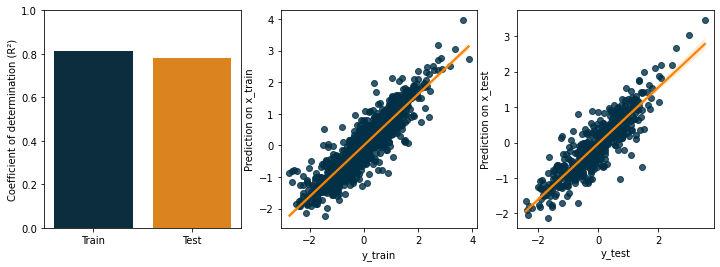

In [34]:
# Data Preprocessing
x_train, x_test, y_train, y_test, transformer, t_scaler = preprocessing('TotalGHGEmissions')

model = Ridge(alpha = 1)
pipe = make_pipeline(transformer, model)
pipe.fit(x_train, y_train)

r2, mse, rmse, mae = evaluate_log_target(pipe, x_train, x_test, y_train, y_test)

The results obtained corresponds to predictions of scaled values. However, the predicted values can be transformed in their original unit for a better clarity. The metrics (R², MSE, RMSE and MAE) have been calculated and displayed graphically for the model predictions in the original units.

The prediction versus true values for the test and train set have been displayed as well.

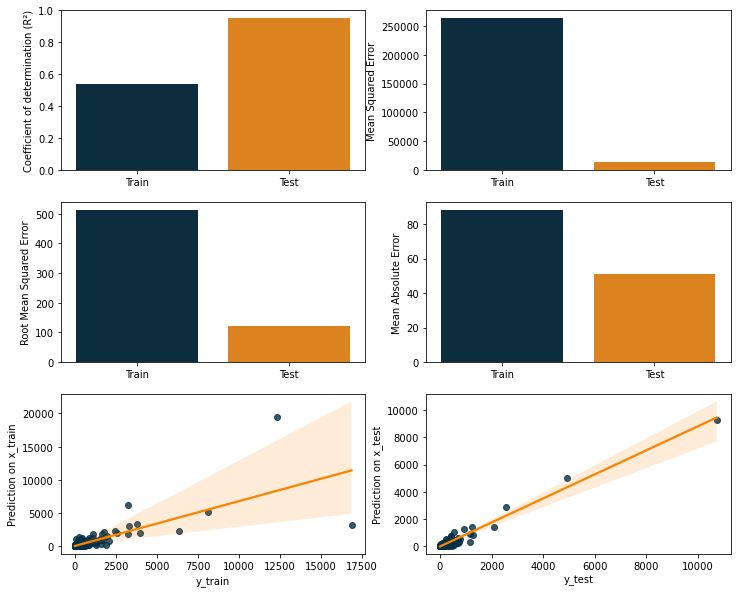

In [35]:
r2, mse, rmse, mae = evaluate_target(pipe, x_train, x_test, y_train, y_test)

In [36]:
# Coef of determination (Train, Test)

r2

[0.5417968248738996, 0.9533672890588644]

In [37]:
# Mean squared error (Train, Test)

mse

[263657.05487054714, 14957.382280848318]

In [38]:
# Root mean squared error (Train, Test)

rmse

[513.4754666686104, 122.3003772718969]

In [39]:
# Mean average error (Train, Test)

mae

[88.29286911229549, 51.15738419520376]

# 4. Influence of the *ENERGYSTARScore*

Influence of the use of the feature *Energystarscore* as a parameter is then evaluated

First, as this score is missing for multiple samples, only samples containg a *ENERGYSTARScore* are kept in the database.

Then the model previously optimised is again optimized but this time with the new feature.

In [40]:
df_ESS = df.dropna(subset = ['ENERGYSTARScore']) # Dataframe with complete ENERGYSTARScore
df_ESS.shape

(1090, 22)

The field *ENERGYSTARScore* is checked for outliers

<AxesSubplot:xlabel='ENERGYSTARScore'>

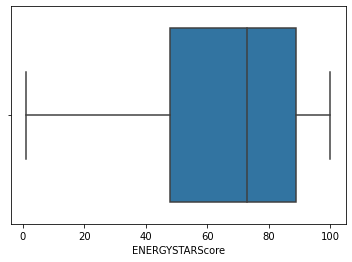

In [41]:
sns.boxplot(x = df_ESS['ENERGYSTARScore'])

Data are preprocessed

In [42]:

x = df_ESS.drop(['TotalGHGEmissions',
             'SiteEnergyUse(kBtu)',
             'Neighborhood',
             'streetType',
             'LargestPropertyUseType',
             'SecondLargestPropertyUseType',
             'ThirdLargestPropertyUseType',
             'NumberofBuildings',
             'Imp_NumberofFloors'], axis = 1)

y = df_ESS['TotalGHGEmissions']

# Train and test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
    
# Target preprocessing

t_scaler = StandardScaler().fit(np.log1p(y_train.values.reshape(-1,1)))

y_train = t_scaler.transform(np.log1p(y_train).values.reshape(-1,1)).reshape(-1,)
y_test = t_scaler.transform(np.log1p(y_test).values.reshape(-1,1)).reshape(-1,)
    
    

# split categorical and numerical columns

col_cat = x.select_dtypes(exclude = [float, int]).columns

col_num = x.select_dtypes(include = [float, int]).columns

# Numerical features preprocessing
# split log and non-log numerical data

col_log_num = [col for col in col_num if col in log_list]

col_nonLog_num = [col for col in col_num if col not in log_list]

pipe_log = make_pipeline(LogTransformer, StandardScaler()) # Creating a pipepline to both transform to log, add polynomial features and scale numerical data

pipe_nonLog = make_pipeline(StandardScaler()) # Creating a pipepline to both add polynomial features and scale numerical data



# Categorical feature preprocessing
# split cat depending on the number of unique labels per cat

cat_threshold = 25

col_cat_HOE = [col for col in col_cat if df[col].nunique() <= cat_threshold]







# Combining the preprocessing transformers

transformer = make_column_transformer((pipe_log, col_log_num),
                                        (pipe_nonLog, col_nonLog_num),
                                        (OneHotEncoder(handle_unknown = 'ignore'), col_cat_HOE))

In [43]:
model = Ridge()

params_cv = {'ridge__alpha': np.logspace(-4, 2, 10)}


pipe = model_eval(transformer, model, params_cv, x_train, x_test, y_train, y_test)

      Train                Test                
R²   0.902               0.895               
MSE  0.0984              0.119               
RMSE 0.314               0.344               
MAE  0.213               0.233               


In [44]:
pipe.best_params_

{'ridge__alpha': 1.0}

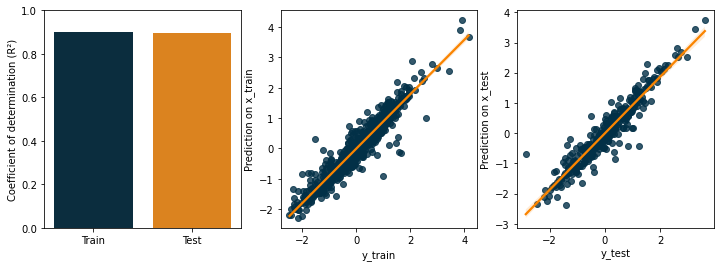

In [45]:
r2, mse, rmse, mae = evaluate_log_target(pipe, x_train, x_test, y_train, y_test)

In [46]:
# Coef of determination

r2

[0.901615499176922, 0.8950954706858989]

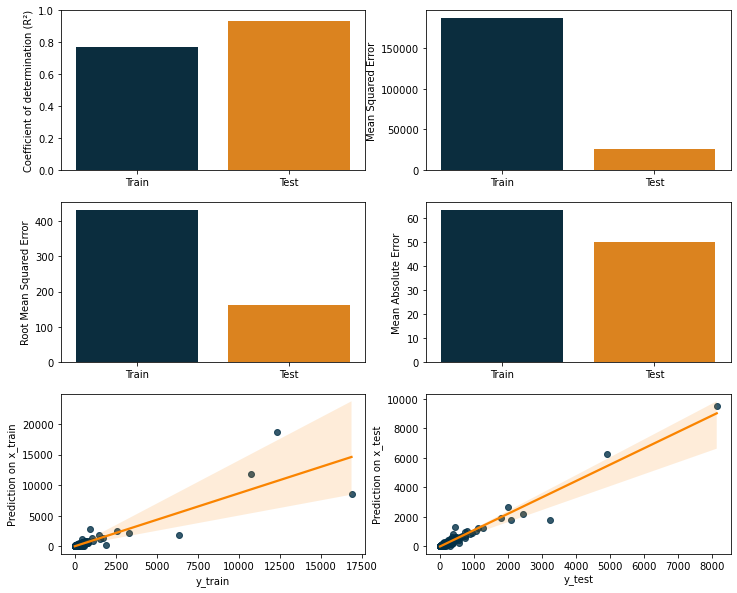

In [47]:
r2, mse, rmse, mae = evaluate_target(pipe, x_train, x_test, y_train, y_test)

In [48]:
# Coef of determination (Train, Test)

r2

[0.77015462647174, 0.9306874067123079]

In [49]:
# Mean squared error (Train, Test)

mse

[186722.12778440502, 25753.527846974983]

In [50]:
# Root mean squared error (Train, Test)

rmse

[432.11355889905263, 160.47905734697903]

In [51]:
# Mean average error (Train, Test)

mae

[63.27902967066479, 49.85811831472107]

The wheigt given to the features in the model are then displayed

<AxesSubplot:>

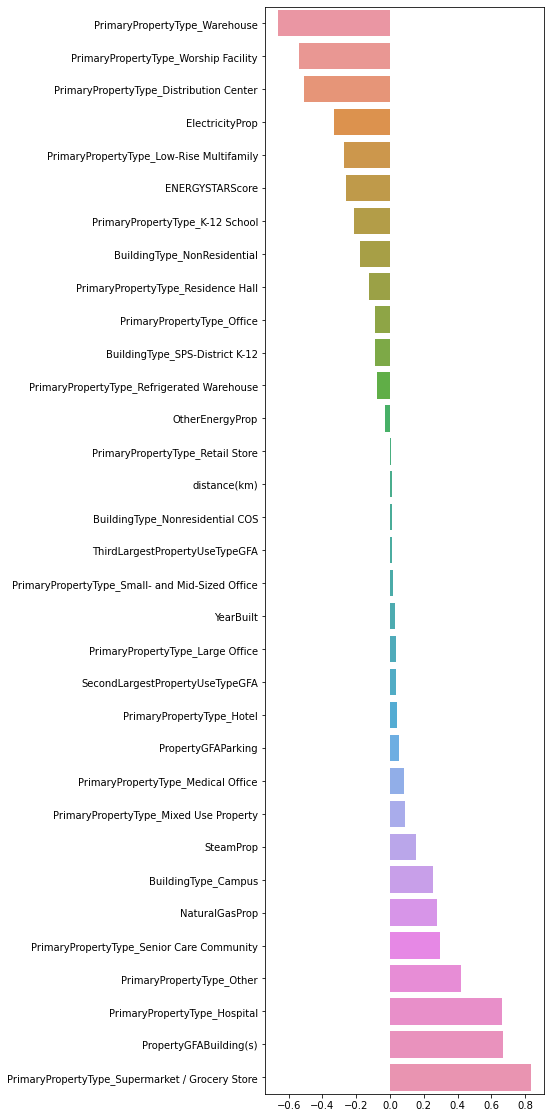

In [52]:
# Getting the name of all parameters through the pipeline
features_names = np.concatenate((pipe.best_estimator_.steps[0][1].transformers_[0][1].get_feature_names_out(col_log_num),
                            pipe.best_estimator_.steps[0][1].transformers_[1][1].get_feature_names_out(col_nonLog_num),
                            pipe.best_estimator_.steps[0][1].transformers_[2][1].get_feature_names_out(col_cat_HOE)),
                            axis = None)


features_weights = pipe.best_estimator_['ridge'].coef_

# Sort the weights with their corresponding label
arg_wheigt = features_weights.argsort()
features_weights = features_weights[arg_wheigt]
features_names = features_names[arg_wheigt]

fig, ax = plt.subplots(figsize = (5,20))

sns.barplot(x = features_weights,
            y = features_names)

Multiple observations can be drawn :
- Without the *ENERGYSTARScore* the R² and RMSE on the test sample is 0.96 and 119.05 but seems unstable (when compared to the train sample.
- With the *ENERGYSTARScore* the R² and RMSE on the test sample is 0.90 but appears much more stable.
- Moreover the *ENERGYSTARScore* get allocated a non negligible weight from the model, underlining its importance.

Thus, it can be concluded that the *ENERGYSTARScore* allows to assure more accurate prediction, but so could as an example feed the database with more samples as an example. Thus the profit/cost balance should be considered by the client.